In [254]:
import numpy as np
import random
import time
import math
import random
import os
import sys
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from collections import Counter

# Notebook path
current_directory = os.getcwd()
# Get one behind for calling the other modules
root_directory = os.path.abspath(os.path.join(current_directory, '..'))
sys.path.append(root_directory)

#Network and measures
from to_get_data.net_construction_vis_measures import *

from to_get_data.generate_database import *
#Agrobiodiversity
from to_get_data.agrobiodiversity_data import *

from model_class.Variety import Variety
from model_class.UD import *

In [ ]:
#ENDOGAMY 
#Parameters endogamy
iniciais = 30 # Initial UD
communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
random.shuffle(communities)
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 401 #steps of the simulation
dataset = [] # For the dataset
#### Initialization endogamy
## Communities
UD_endogamy.uds = {}
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
        instancias_ud.append(UD_endogamy(id_ud, media, communities.pop()))
## Varieties
limited_varieties = True
if limited_varieties == False:
    for id_ud, ud in UD_endogamy.uds.items():
        for _ in range(5):
            ud.varieties.append(Variety())
else:
    initial_varieties = [Variety() for _ in range (10)]
    for ud in UD_endogamy.uds.values():
        for _ in range(3):
            ud.varieties.append(random.choice(initial_varieties))

#### Simulation endogamy
vivas = [int(iniciais)]
for i in range (1, (t)):
    uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
    if not uds_copy:
        print("acabo")
        break
    # Cycle: 
    for id_ud, ud in uds_copy.items():
        ud.ter_filho()
        ud.buscar_ud(media, 50, True)
        ud.incrementar_idade()
        ud.death_probability(prob_morte)
    # Visualizations
    if i % 50 == 0: 
        create_vis_geral(uds_copy, True)
        dataset = general_charactersitics_data(i, uds_copy, dataset, False, False)
        G = marriage_graph_attribute(uds_copy, "community", False)
        # community
        results_community = count_links_between_and_within(G, 'community')
        p_graph_attribute(uds_copy, "community", False)
        print(f"tamos en tiempo {i} con vivas {viv}")
        #p_graph(uds_copy, True)

    # Collecting data for population
    viv = len([ud for id, ud in uds_copy.items() if ud.activa])
    vivas.append(viv)        
print(len([ud for id, ud in uds_copy.items() if ud.activa]))
dataset = general_charactersitics_data(i, uds_copy, dataset, True, False)

In [276]:
#ENDOGAMY 
#Parameters endogamy
iniciais = 30 # Initial UD
communities = (list(range(1, 2 + 1)) * (iniciais // 2)) # Just 2 communities
random.shuffle(communities)
prob_morte = 0.06 # Beta from the gutertz equation
media = 4 # Average children per UD
random.seed(42) # Random seed
t = 401 #steps of the simulation
dataset = [] # For the dataset
#### Initialization endogamy
## Communities
UD_endogamy.uds = {}
instancias_ud = []
for id_ud in range(1, int(iniciais) + 1):
        instancias_ud.append(UD_endogamy(id_ud, media, communities.pop()))
## Varieties
limited_varieties = True
if limited_varieties == False:
    for id_ud, ud in UD_endogamy.uds.items():
        for _ in range(3):
            ud.varieties.append(Variety())
else:
    initial_varieties = [Variety() for _ in range (10)]
    for ud in UD_endogamy.uds.values():
        for _ in range(3):
            ud.varieties.append(random.choice(initial_varieties))
#print()

children = [len(ud.filhos) for ud in UD_endogamy.uds.values()] #This is a list to get all the children that were in the inizialization
mean_experiment = [] #This get me the mean of varieties by UD
distribution = [] #This give me the list of all varieties in the system
system_diversity = [] #This give me the diversity at the systems level.
for j in range(5):
    i_u = 0     
    UD_endogamy.uds = {ud.id: ud for ud in instancias_ud}
    for ud in UD_endogamy.uds.values():
        ud.parentes = [None]*10
        ud.age = 1
        ud.activa = True
        ud.filhos = [None] * (children[i_u])
        i_u += 1
    #### Simulation endogamy
    #vivas = [int(iniciais)]
    for i in range (1, (300)):
        uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
        if not uds_copy:
            print("acabo")
            break
        # Cycle: 
        for id_ud, ud in uds_copy.items():
            ud.ter_filho()
            ud.buscar_ud(media, 50, True)
            ud.incrementar_idade()
            ud.death_probability(prob_morte)
        # Visualizations
        #if i % 50 == 0: 
            #create_vis_geral(uds_copy, True)
            #dataset = general_charactersitics_data(i, uds_copy, dataset, False, False)
            #G = marriage_graph_attribute(uds_copy, "community", False)
            # community
            #results_community = count_links_between_and_within(G, 'community')
            #p_graph_attribute(uds_copy, "community", False)
            #print(f"tamos en tiempo {i} con vivas {viv}")
            #p_graph(uds_copy, True)

        # Collecting data for population
        #viv = len([ud for id, ud in uds_copy.items() if ud.activa])
        #vivas.append(viv)   
    uds_copy = {id_ud: ud for id_ud, ud in UD_endogamy.uds.items() if ud.activa}
    varieties_by_ud = [len(ud.varieties) for ud in uds_copy.values()]
    mean_experiment.append(sum(varieties_by_ud) / len(varieties_by_ud))
    all_varieties = [variety.variety_id for row in uds_copy.values() for variety in row.varieties]
    system_diversity.append(len(set(all_varieties)))
    distribution.append(all_varieties)
    print(len([ud for id, ud in uds_copy.items() if ud.activa]), len(set(all_varieties)))

86 8
93 8
162 6
82 6
176 6


In [279]:
mean_experiment

[4.0, 4.0, 4.0, 4.0, 4.0]

In [278]:
sum(system_diversity)/len(system_diversity)

6.8

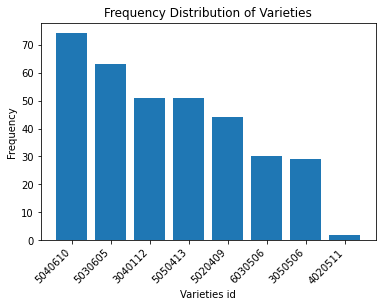

Diversity at the community level: 8 


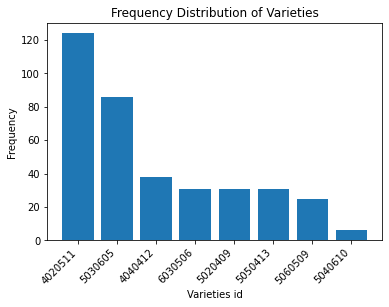

Diversity at the community level: 8 


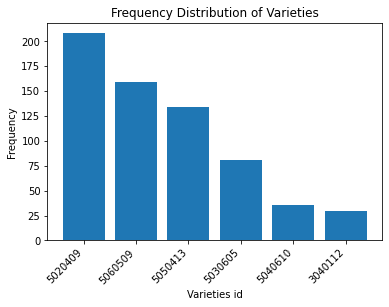

Diversity at the community level: 6 


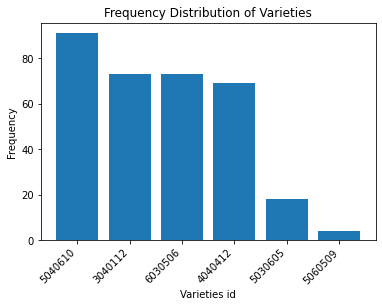

Diversity at the community level: 6 


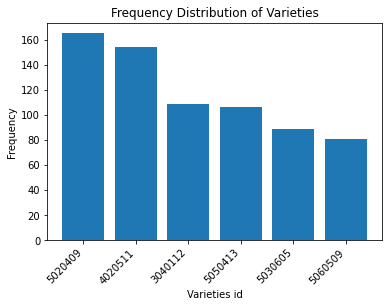

Diversity at the community level: 6 


In [277]:
for list_varieties in distribution:
    list_varieties = [str(x) for x in list_varieties] 
    diversity_community_level = len(set(list_varieties))
    #mean = dataset_example.loc[:, 'Num_Varieties_by_UD'].mean()
    #To create the plot of frequency of varieties. I still have to think how to explicit the steps
    varieties_counts = Counter(list_varieties)
    varieties_counts = sorted(varieties_counts.items(), key=lambda x: x[1], reverse=True)
    varieties, counts = zip(*varieties_counts)
    # Plot
    plt.bar(varieties, counts)
    plt.xlabel("Varieties id")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45, ha='right')
    plt.title("Frequency Distribution of Varieties")
    plt.show()
    print(f"Diversity at the community level: {diversity_community_level} ")

In [273]:
list_varieties = [str(x) for x in list_varieties] 
varieties_counts = Counter(list_varieties)
varieties_counts = sorted(varieties_counts.items(), key=lambda x: x[1], reverse=True)
varieties, counts = zip(*varieties_counts)
varieties_counts
print(varieties, counts)

('5060312', '5050616', '9050609', '4050516', '6030506', '5040412', '7050310', '4040406') (103, 103, 20, 20, 20, 20, 11, 11)


<BarContainer object of 8 artists>

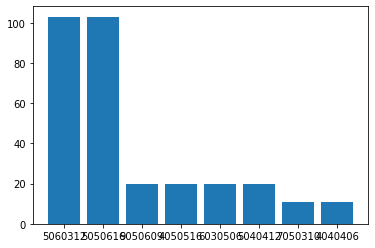

In [274]:
plt.bar(varieties, counts)

In [266]:
for diversity in distribution:
    print((type(diversity)))

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


In [241]:
diversity

[5020409,
 5050308,
 7040608,
 4050706,
 1050309,
 5070513,
 6050409,
 6050512,
 6030606,
 3050515,
 1050309,
 5070513,
 5040212,
 2040608,
 1050309,
 5070513,
 5020409,
 5050308,
 5020409,
 5050308,
 6030606,
 3050515,
 1050309,
 5070513,
 5040212,
 2040608,
 5020409,
 5050308,
 1050309,
 5070513,
 6030606,
 3050515,
 5020409,
 5050308,
 1050309,
 5070513,
 5020409,
 5050308,
 1050309,
 5070513,
 1050309,
 5070513,
 7040608,
 4050706,
 5020409,
 5050308,
 6030606,
 3050515,
 4030411,
 3080406,
 1050309,
 5070513,
 5020409,
 5050308,
 5040212,
 2040608,
 4030411,
 3080406,
 5040212,
 2040608,
 5020409,
 5050308,
 5040212,
 2040608,
 6030606,
 3050515,
 1050309,
 5070513,
 5040212,
 2040608,
 7040608,
 4050706,
 1050309,
 5070513,
 5020409,
 5050308,
 6050409,
 6050512,
 7040608,
 4050706,
 6030606,
 3050515,
 1050309,
 5070513,
 1050309,
 5070513,
 4030411,
 3080406,
 6030606,
 3050515,
 5020409,
 5050308,
 1050309,
 5070513,
 5020409,
 5050308,
 1050309,
 5070513,
 6050409,
 6050512,
